# Machine Learning Fundamentals - Lecture 07

This is the Jupyter notebook for Lecture 07 of the Machine Learning Fundamentals course.

In [1]:
# Import the required libraries using the commonly use short names (pd, sns, ...)
import pandas as pd

# The Path object from pathlib allows us to easily build paths in an
# OS-independent fashion
from pathlib import Path

# Load the required scikit-learn classes and functions
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    precision_score,
    recall_score,
    roc_auc_score,
    RocCurveDisplay,
    ConfusionMatrixDisplay,
)

# Load matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nicer style for Seaborn plots
sns.set_style("darkgrid")

## Load dataset and perform initial assessment

We'll start by loading the dataset, and take a look at what information is
contained there.

In [2]:
# Load the dataset (note the use of the Path object)
df = pd.read_csv(Path("..", "datasets", "high_diamond_ranked_10min.csv"))

# Let's get some information about the columns in this table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [3]:
# See standard descriptive statistics about each column (expect gameId, see
# below)
# - The T property allows us to see the dataframe transposed, which is more
# useful when we have a large number of features, which is the case here
df.drop(columns=["gameId"]).describe().T

,count,mean,std,min,25%,50%,75%,max
blueWins,9879.0,0.499038,0.500024,0.0,0.00,0.0,1.00,1.0
blueWardsPlaced,9879.0,22.288288,18.019177,5.0,14.00,16.0,20.00,250.0
blueWardsDestroyed,9879.0,2.824881,2.174998,0.0,1.00,3.0,4.00,27.0
blueFirstBlood,9879.0,0.504808,0.500002,0.0,0.00,1.0,1.00,1.0
blueKills,9879.0,6.183925,3.011028,0.0,4.00,6.0,8.00,22.0
blueDeaths,9879.0,6.137666,2.933818,0.0,4.00,6.0,8.00,22.0
blueAssists,9879.0,6.645106,4.064520,0.0,4.00,6.0,9.00,29.0
blueEliteMonsters,9879.0,0.549954,0.625527,0.0,0.00,0.0,1.00,2.0
blueDragons,9879.0,0.361980,0.480597,0.0,0.00,0.0,1.00,1.0
blueHeralds,9879.0,0.187974,0.390712,0.0,0.00,0.0,0.00,1.0


Now that we took a look at the columns, let's organize the data into features
`X` and labels `y`, making it ready for us to start the requested tasks.

We'll drop the `"gameID"` column, since it won't be useful for us (it serves
only to get more info from the Riot API). We'll also drop the `"blueWins"`
column from the features, since this is the label we aim to predict (i.e., it'll
be our `y`).

In [4]:
# Get our features into the X matrix, dropping the gameId column (we won't need
# it) and the blueWins column (because it contains the target labels we aim to
# predict)
X = df.drop(columns=["gameId", "blueWins"]).to_numpy()

# Get the labels into the y vector
y = df["blueWins"].to_numpy()

In [5]:
# Quick look at X's shape: 9879 examples, 38 features
X.shape

(9879, 38)

The following code was not mandatory for the homework. It performs
dimensionality reduction using a technique called PCA, basically converting the
38 features into 2. We'll do this just to have an intuition on how separable the
data might be.

Dimensionality reduction will be addressed in a future lecture in the context of
unsupervised learning techniques.

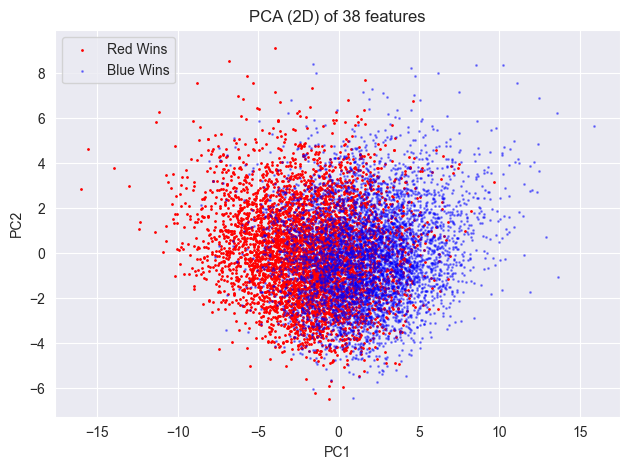

In [6]:
# Create a pipeline with standard scaling and PCA
model = make_pipeline(StandardScaler(), PCA(n_components=2))

# Reduce dimensionality of our feature dataset to two dimensions
X_pca = model.fit_transform(X)

# Plot the reduced features into 2D space
fig, ax = plt.subplots()

# Cycle through the two classes and respective plot configurations
for cls, lbl, clr, alp in zip([0, 1], ["Red Wins", "Blue Wins"], ["r", "b"], [1, 0.4]):

    # Get the indexes of the points that belong to the current class (0 or 1,
    # i.e. red wins or blue wins)
    idx = (y == cls)

    # Scatter the points into the plot
    ax.scatter(X_pca[idx, 0], X_pca[idx, 1], s=1, alpha=alp, color=clr, label=lbl)

# Final plot labels
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("PCA (2D) of 38 features")
ax.legend()
fig.tight_layout()

It's possible to observe two clear clusters, but there is considerable overlap.
In the next section we'll try to classify these points as best as possible with
SVM.

Before we start searching for the best SVM parameters to perform this
classification, let's split the data into train and test sets:

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Find $C$ and $\gamma$ that maximize the F1 score (macro) on predicting `"blueWins"`

In [8]:
# Create a pipeline incorporating standard scaling and classification with a
# SVM classifier
pipe = Pipeline([("scale", StandardScaler()), ("svc", SVC())])

# Specify the parameters to search
# Since were using a pipeline, we need to prefix each parameter with the tag
# identifying our classifier within the pipelin
param_grid = {
    "svc__C": [0.001, 0.01, 0.1, 1, 10, 100],
    "svc__gamma": ["scale", 0.0001, 0.001, 0.1, 1, 10, 100, 1000],
}

# Perform grid search using 5-fold cross-validation, score using the F1 metric
# (macro), use all CPU cores to compute in parallel (n_jobs=-1)
grid = GridSearchCV(pipe, param_grid, scoring="f1_macro", n_jobs=-1, cv=5)
grid.fit(X_train, y_train)

# Check out the best parameters
print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)

# Keep a reference to the model with the best parameters, will come in handy
# late
best_model = grid.best_estimator_

Best params: {'svc__C': 1, 'svc__gamma': 0.001}
Best score: 0.7298224680509037


The best parameters (within those searched) are:

$
\begin{cases}
C=1\\
\gamma=0.001
\end{cases}
$

A balanced $C$ (balanced regularization) and low $\gamma$. Before we discuss why
these SVM parameters behaved well with this dataset, let's dig a little bit
deeper.

First, let's filter out unnecessary timing results from the cross validation
data, and look at the F1 scores for the top 10 performing parameter sets,
including per fold results:

In [9]:
# Create a dataframe with the cross validation results we want (i.e., everything
# except the timming stuff and the params dictionary), and sort ascending by
# rank_test_score (would be the same as sort descending by mean_test_score)
df_cv_results = (
    pd.DataFrame(grid.cv_results_)
    .drop(
        columns=[
            "mean_fit_time",
            "std_fit_time",
            "mean_score_time",
            "std_score_time",
            "params",
        ]
    )
    .sort_values("rank_test_score", ascending=True)
)

# Look at the top 10 results
df_cv_results.head(10)

,param_svc__C,param_svc__gamma,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
26,1.00,0.001,0.741906,0.723548,0.740004,0.718353,0.725301,0.729822,0.009392,1
24,1.00,scale,0.736228,0.725477,0.736852,0.713920,0.732247,0.728945,0.008535,2
33,10.00,0.0001,0.740004,0.722264,0.738766,0.718983,0.724022,0.728808,0.008795,3
16,0.10,scale,0.740018,0.719722,0.738140,0.715809,0.729051,0.728548,0.009633,4
18,0.10,0.001,0.740653,0.722283,0.731176,0.716427,0.730327,0.728173,0.008271,5
8,0.01,scale,0.740031,0.722928,0.734340,0.711370,0.731584,0.728051,0.010001,6
25,1.00,0.0001,0.740653,0.721646,0.731807,0.715797,0.727804,0.727541,0.008519,7
41,100.00,0.0001,0.738117,0.722947,0.735580,0.718353,0.722152,0.727430,0.007886,8
34,10.00,0.001,0.736209,0.724185,0.736182,0.717693,0.722756,0.727405,0.007495,9
17,0.10,0.0001,0.737413,0.722547,0.730403,0.714131,0.730064,0.726912,0.007935,10


We see quite some variation in the values of $C$ and $\gamma$. Not so much in
the values of the F1 score in these top results, which all have mean F1 scores
around $0.72$-$0.73$.

We'll try to get a better picture of how F1 varies across the complete tested
parameter sets, but first the homework had a requested to "plot the F1-score
distribution across folds for the best found hyperparameter combination", so
let's do that. We'll do this to the top 5 results, to be a little more
informative.

In [10]:
# Get top 5 CV results
df_cv_results_top5 = df_cv_results.head(5).copy()

# Create a new params column, which we'll use as labels for our plots
df_cv_results_top5["params"] = (
    "$C="
    + df_cv_results_top5["param_svc__C"].astype(str)
    + "$, $\\gamma="
    + df_cv_results_top5["param_svc__gamma"].astype(str)
    + "$"
)

# A quick look at this data frame
df_cv_results_top5

,param_svc__C,param_svc__gamma,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,params
26,1.0,0.001,0.741906,0.723548,0.740004,0.718353,0.725301,0.729822,0.009392,1,"$C=1.0$, $\gamma=0.001$"
24,1.0,scale,0.736228,0.725477,0.736852,0.713920,0.732247,0.728945,0.008535,2,"$C=1.0$, $\gamma=scale$"
33,10.0,0.0001,0.740004,0.722264,0.738766,0.718983,0.724022,0.728808,0.008795,3,"$C=10.0$, $\gamma=0.0001$"
16,0.1,scale,0.740018,0.719722,0.738140,0.715809,0.729051,0.728548,0.009633,4,"$C=0.1$, $\gamma=scale$"
18,0.1,0.001,0.740653,0.722283,0.731176,0.716427,0.730327,0.728173,0.008271,5,"$C=0.1$, $\gamma=0.001$"


In [11]:
# To create the distribution plots, we need to...
df_cv5l = (
    # ...drop unnecessary columns...
    df_cv_results_top5.drop(
        columns=[
            "param_svc__C",
            "param_svc__gamma",
            "mean_test_score",
            "std_test_score",
            "rank_test_score",
        ]
    )
    # ...put each individual fold F1 score in a separate row associated with
    # the parameter set that generated it...
    .melt(id_vars="params", var_name="fold", value_name="f1_score")
    # ...and also drop the "fold" column, which just contains the fold info
    # (e.g., "split1_test_score", etc)
    .drop(columns=["fold"])
)

# Let's take a look at the data frame, now ready for plotting the distribution
# of the per-fold F1 scores
df_cv5l

,params,f1_score
0,"$C=1.0$, $\gamma=0.001$",0.741906
1,"$C=1.0$, $\gamma=scale$",0.736228
2,"$C=10.0$, $\gamma=0.0001$",0.740004
3,"$C=0.1$, $\gamma=scale$",0.740018
4,"$C=0.1$, $\gamma=0.001$",0.740653
5,"$C=1.0$, $\gamma=0.001$",0.723548
6,"$C=1.0$, $\gamma=scale$",0.725477
7,"$C=10.0$, $\gamma=0.0001$",0.722264
8,"$C=0.1$, $\gamma=scale$",0.719722
9,"$C=0.1$, $\gamma=0.001$",0.722283


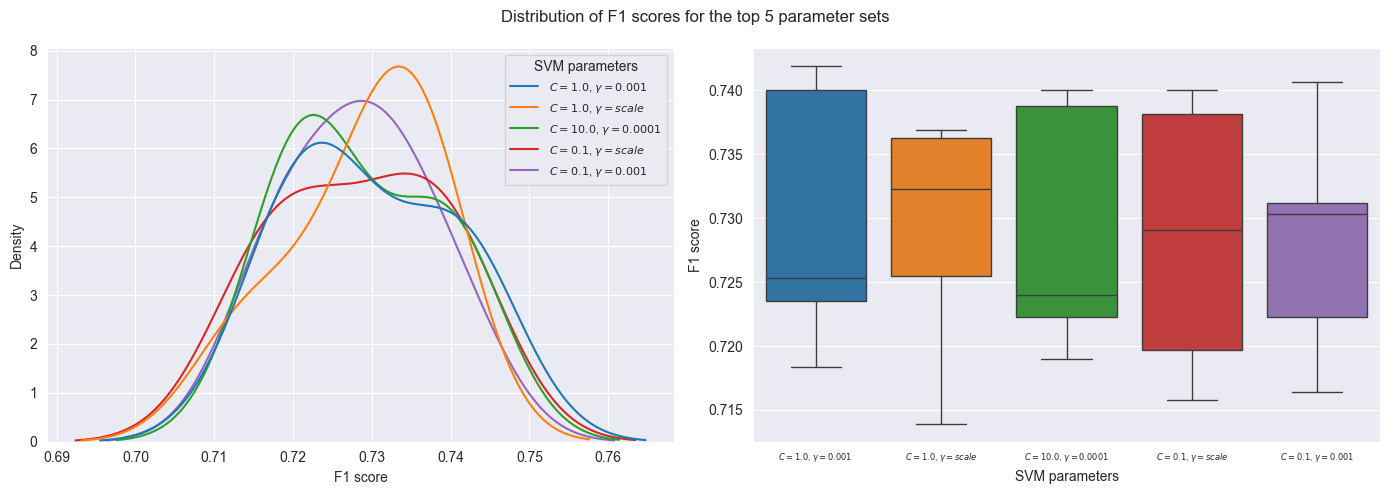

In [12]:
# We'll see this distribution in two ways: 1) as a KDE plot, good for having an
# idea of the mean and standard deviation; and, 2) as a boxplot, to focus on the
# median and quartiles
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Let's start with the KDE plot
sns.kdeplot(data=df_cv5l, x="f1_score", hue="params", ax=ax[0])
ax[0].set_xlabel("F1 score")
ax[0].get_legend().set_title("SVM parameters")
for leg_text in ax[0].get_legend().get_texts():
    leg_text.set_fontsize(8)

# And now for the boxplot
sns.boxplot(data=df_cv5l, x="params", y="f1_score", hue="params", ax=ax[1])
ax[1].set_xlabel("SVM parameters")
ax[1].set_ylabel("F1 score")
for x_label in ax[1].get_xticklabels():
    x_label.set_fontsize(6)

# Nice top title
fig.suptitle("Distribution of F1 scores for the top 5 parameter sets")

fig.tight_layout()

Again, we see small differences in the F1 score distribution for the top 5
parameter sets. While the $\gamma$'s are apparently between $0.0001$ and _scale_
($0.0263$, as we shall see next), we need to dig a bit more to understand what's
going on with $C$. These top F1 scores can be obtained with $C$'s ranging from
$0.1$ to $10$. Let's create a $C\times\gamma$ heatmap to better understand how
the F1 score varies between these two parameters.

In [13]:
# Let's first get the value of gamma when it's set to "scale"
# According to scikit-learn's SVC documentation, when set to "scale", the actual
# gamma value is obtained from the formula: 1 / (n_features * X.var())
#
# Since our X is scaled within the pipeline, we know that X.var() is around 1
# (that's what standard scaling does), so in practice, gamma="scale"=1 / n_features:
gamma_scale = 1.0 / X_train.shape[1]

print(f"gamma_scale = {gamma_scale:.4f}")

gamma_scale = 0.0263


In [14]:
# Let's now replace "scale" with the actual value of gamma_scale
df_cv_results = df_cv_results.replace("scale", f"{gamma_scale:.4f}").astype(float)

# To plot a heatmap, we need to pivot our CV results data frame so that C is the
# row index and gamma is the column index
df_pvted = df_cv_results.pivot(
    index="param_svc__C", columns="param_svc__gamma", values="mean_test_score"
)

# Let's check out the pivoted dataframe
df_pvted

param_svc__gamma,0.0001,0.0010,0.0263,0.1000,1.0000,10.0000,100.0000,1000.0000
param_svc__C,,,,,,,,
0.001,0.335156,0.335156,0.335156,0.335156,0.335156,0.335156,0.335156,0.335156
0.010,0.335156,0.726396,0.728051,0.550588,0.335156,0.335156,0.335156,0.335156
0.100,0.726912,0.728173,0.728548,0.718137,0.335156,0.335156,0.335156,0.335156
1.000,0.727541,0.729822,0.728945,0.717659,0.404250,0.335156,0.335156,0.335156
10.000,0.728808,0.727405,0.706545,0.669935,0.434366,0.335156,0.335156,0.335156
100.000,0.727430,0.725643,0.655291,0.663488,0.434366,0.335156,0.335156,0.335156


In [15]:
# It would be cool to show the best F1 score rank from best to worst, so let's
# create a data frame with the rank values instead of the F1 scores
df_pvted_rank = df_cv_results.pivot(
    index="param_svc__C", columns="param_svc__gamma", values="rank_test_score"
)

# Let's check if it has the ranks we want
df_pvted_rank

param_svc__gamma,0.0001,0.0010,0.0263,0.1000,1.0000,10.0000,100.0000,1000.0000
param_svc__C,,,,,,,,
0.001,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0
0.010,23.0,11.0,6.0,19.0,23.0,23.0,23.0,23.0
0.100,10.0,5.0,4.0,13.0,23.0,23.0,23.0,23.0
1.000,7.0,1.0,2.0,14.0,22.0,23.0,23.0,23.0
10.000,3.0,9.0,15.0,16.0,20.0,23.0,23.0,23.0
100.000,8.0,12.0,18.0,17.0,20.0,23.0,23.0,23.0


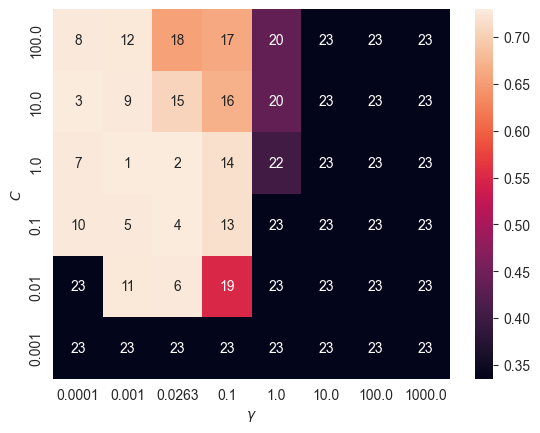

In [16]:
# Now we can plot the heatmap
# The .iloc trick is just to reverse the data frame rows, so that C appears
# from lower to higher in the y axis
ax = sns.heatmap(df_pvted.iloc[::-1], annot=df_pvted_rank.iloc[::-1])
ax.set_xlabel("$\\gamma$")
ax.set_ylabel("$C$");

Now a few interesting things can be inferred from these results:

- There is an obvious cluster of higher F1 score's to the top left of the
  heatmap. In general, the SVM classifier seems to prefer $C \geq 0.01$ and
  $\gamma \leq 0.1$.
- Setting $\gamma$ to `"scale"` (resulting in $0.0263$ in this case) seems to
  keep the F1 score quite consistent across values of $C \geq 0.01$.

So, why does the model tend to prefer these values?

First, remember that $C$ controls the regularization strength, i.e., it controls
the tradeoff between margin width and classification errors on the training
data:

- A smaller $C$ provides a wider margin and more regularization, allowing some
misclassifications due to a simpler, smoother decision boundary.
- A larger $C$ implies a narrower margin and less regularization, fitting
  training data more closely and the associated risk of overfitting.

Second, $\gamma$, which is the RBF kernel width, controls how localized each
training point's influence is:

- A smaller $\gamma$ means a broader kernel where each point affects a larger
  region, resulting in a smoother, more global decision surface (i.e., with
  low variance).
- A larger $\gamma$ implies a narrower kernel where each point affects only a
  small region, resulting in a wiggly decision boundary (i.e., with high
  variance).

The "League of Legends Diamond Ranked Games (10 min)" dataset has 38 features
and almost 10k samples. Considering this, if $\gamma$ is too large, the RBF
kernel overfits, since it creates very localized decision boundaries around
specific examples. These game stats are probably noisy (e.g., small random
fluctuations in gold or kills), so a high $\gamma$ means the SVM chases this
noise instead of generalizing to the broader trends. Conversely, a lower
$\gamma$ leads to smoother decision regions, better fitting the nature of the
problem. Using these same ideas, if $C$ is too small, the SVM underfits, since
 the margin is too wide and fails to separate cases where the blue team clearly
 has a lead. As $C$ increases (to 0.1 or 1.0), the model becomes flexible
 enough to capture useful patterns (e.g., gold advantage, vision difference),
 without yet overfitting. The combined best values, $C \in \{0.1, 1, 10\}$ and
 $\gamma \leq 0.1$, correspond to a moderately flexible, smooth SVM model that
 balances generalization and fit.
 
 This matches the intuition that LoL match outcomes depend on broad team-level
 advantages, not micro-level idiosyncrasies, so the SVM works best with a
 moderately regularized, smooth RBF decision surface.

## Various metrics for the "best hyperparameters" applied to the test set

Now that we've found the best hyperparameters using cross validation, let's
apply the model to the test set and get some metrics for this, yet to be seen,
data.

First, we'll retrain the SVM classifier with these best hyperparameters and the
`probability` parameter set to `True`. This last parameter will allow us to
obtain an accurate value for the area under the ROC curve, since SVM
classifiers don't work directly with probability scores.

In [17]:
# Remember the best hyperparameters found
grid.best_params_

{'svc__C': 1, 'svc__gamma': 0.001}

In [18]:
# Retrain the SVC with the best parameters *and* probability set to true
best_svc = make_pipeline(
    StandardScaler(),
    SVC(
        C=grid.best_params_["svc__C"],
        gamma=grid.best_params_["svc__gamma"],
        probability=True,
    ),
).fit(X_train, y_train)

# Get probabilities using the test set
y_scores = best_svc.predict_proba(X_test)

# Get predictions using the test set
y_pred = best_svc.predict(X_test)

Let's look at the confusion matrix. Remember what each value in the matrix
represents:

$
\begin{bmatrix}
TP & FN\\
FP & TN
\end{bmatrix}
$

To make sure that "positive" here means "blue wins", we need to specify the
`labels` parameter to place the focus on 1 ("blue wins"):

In [19]:
# Calculate the confusion matrix focusing on "blue wins"
cf = confusion_matrix(y_test, y_pred, labels=[1, 0])

# Let's get the individual values for calculating metrics by hand later
tp, fn, fp, tn = cf.ravel()

# Display the confusion matrix
cf

array([[687, 259],
       [262, 768]])

We can make this even nicer:

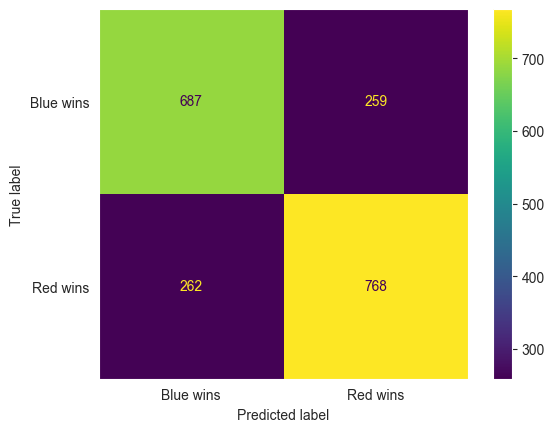

In [20]:
# We'll create an empty figure first, so we can disable its grid
fig, ax = plt.subplots()
ax.grid(False)

# And not plot the confusion matrix on that figure
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, labels=[1, 0], display_labels=["Blue wins", "Red wins"], ax=ax
)

Now, let's collect accuracy, precision, recall, and the F1 score metrics. The
last three will be from the perspective of "blue wins", and for the F1 score,
we'll also calculate the "macro" version, as requested in the assignment. We'll
also calculate these metrics by hand to make sure we're doing things right.

In [21]:
# A list where to put the metrics, to be later converted into a data frame
metrics = []

# Accuracy
acc_scl = accuracy_score(y_test, y_pred)
acc_man = (tp + tn) / (tp + tn + fp + fn)
metrics.append(["Accuracy", acc_scl, acc_man])

# Precision for blueWins
pre_scl = precision_score(y_test, y_pred) # pos_label=1 by default (blueWins)
pre_man = tp / (tp + fp)
metrics.append(["Precision (1->bw)", pre_scl, pre_man])

# Recall for blueWins
rec_scl = recall_score(y_test, y_pred) # pos_label=1 by default (blueWins)
rec_man = tp / (tp + fn)
metrics.append(["Recall (1->bw)", rec_scl, rec_man])

# F1 score for blueWins
f1s_scl = f1_score(y_test, y_pred) # pos_label=1 by default (blueWins)
f1s_man = 2 * pre_man * rec_man / (pre_man + rec_man)
metrics.append(["F1 (1->bw)", f1s_scl, f1s_man])

# F1 score macro
f1m_scl = f1_score(y_test, y_pred, average="macro")
f1m_man = (f1s_man + f1_score(y_test, y_pred, pos_label=0)) / 2
metrics.append(["F1 (macro)", f1m_scl, f1m_man])

# Convert list to data frame
df_metrics = pd.DataFrame(metrics, columns=["Metric", "Scikit", "Manually"])

# Add an error column just to make sure we didn't mess up the calculations
df_metrics["Error"] = (df_metrics["Scikit"] - df_metrics["Manually"]).round(8)

# Show the metrics
df_metrics

,Metric,Scikit,Manually,Error
0,Accuracy,0.736336,0.736336,0.0
1,Precision (1->bw),0.723920,0.723920,0.0
2,Recall (1->bw),0.726216,0.726216,0.0
3,F1 (1->bw),0.725066,0.725066,-0.0
4,F1 (macro),0.735892,0.735892,0.0


No errors in our manual calculations. We're seeing things right. Also, the
values are all very similar, which means this is a very well-balanced dataset.

Let's compare the F1 score (macro) on the test set with the one obtained from
cross validation (more specifically, its mean):

In [22]:
print(f"F1 score (macro) from CV     : {grid.best_score_:.4f}")
print(f"F1 score (macro) on test set : {f1m_scl:.4f}")

F1 score (macro) from CV     : 0.7298
F1 score (macro) on test set : 0.7359


Interestingly, the macro F1 score on the test set was slightly higher than the
one obtained via cross validation. It's not totally unexpected, since the score
from cross validation is a mean (meaning that some fold-specific score could
have been higher).

## Area under the ROC curve

Without much delay, let's check out the value of the area under the ROC curve.
We'll only use the scikit-learn function `roc_auc_score()`, since calculating
this quantity is not as simple as the other metrics:

In [23]:
roc_auc_score(y_test, y_scores[:,1])

0.8159696422340361

Remember that this area is between 0 and 1, and the value presented is for the
positive class, i.e., "blueWins". Let's plot the actual ROC curve from under
which this area is obtained:

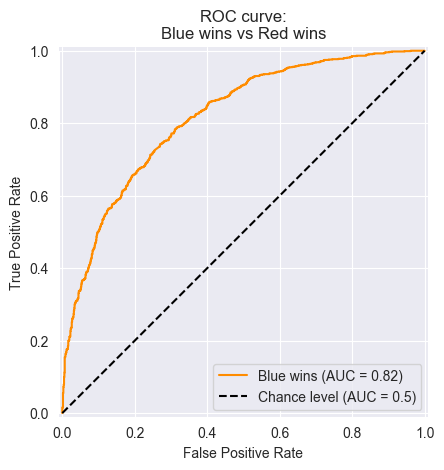

In [24]:
# Let's use the scikit-learn function for plotting the ROC curve
display = RocCurveDisplay.from_predictions(
    y_test,
    y_scores[:, 1],
    name=f"Blue wins",
    curve_kwargs=dict(color="darkorange"),
    plot_chance_level=True,
    despine=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC curve:\nBlue wins vs Red wins",
)

The ROC curve shows that the true positive rate increases much faster than the
false positive rate, meaning this classifier performs well above random
guessing when considering "blueWins" as the positive class (something which was
already obvious by the high area under the curve value of $0.8158$).